# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rakha Hanif Maheswara
- **Email:** rakhahanif21@gmail.com
- **ID Dicoding:** rakhahanif21

## Menentukan Pertanyaan Bisnis

- Bagaimana Konsentrasi Pencemaran Udara Tertinggi di Setiap tahunnya pada Kota Aotizhongxin?
- Bagaimana Konsentrasi Pencemaran Udara Tertinggi di Setiap tahunnya pada Kota Changping?
- Bagaimana rata-rata suhu pada setiap kota?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
Aotizhongxin_df = pd.read_csv("Aotizhongxin.csv")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Menggabungkan kolom Year, Month, Day menjadi Date & Menghilangkan Kolom year, month, day, PRES, DEWP, RAIN, wd, WSPM**

In [5]:
#Menggabungkan kolom Year, Month, Day menjadi Date
Aotizhongxin_df["Date"] = pd.to_datetime(Aotizhongxin_df[["year", "month", "day"]])
#Menghilangkan kolom year, month, day, PRES, DEWP, RAIN, wd, WSPM
Aotizhongxin_df = Aotizhongxin_df.drop(["year", "month", "day","PRES","DEWP","RAIN", "wd","WSPM"], axis=1)
# Cetak DataFrame Baru
Aotizhongxin_df.head()

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,station,Date
0,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,Aotizhongxin,2013-03-01
1,2,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,Aotizhongxin,2013-03-01
2,3,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,Aotizhongxin,2013-03-01
3,4,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,Aotizhongxin,2013-03-01
4,5,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,Aotizhongxin,2013-03-01


* Disini terjadi penggabungan beberapa kolom dari *dataset* Aotizhongxin.csv, yakni Year, Month, dan Day menjadi kolom yang bernama 'Date. Tujuannya adalah untuk bisa digunakan dalam visualisasi data nantinya berdasarkan kolom Date saja.
* Lalu juga ada Dropping kolom year, month, day, PRES, DEWP, RAIN, wd, WSPM karena sudah tidak digunakan dalam proses analisis data selanjutnya.

In [6]:
Changping_df = pd.read_csv("Changping.csv")
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


Menggabungkan kolom Year, Month, Day menjadi Date & Menghilangkan Kolom year, month, day, PRES, DEWP, RAIN, wd, WSPM

In [7]:
#Menggabungkan kolom Year, Month, Day menjadi Date
Changping_df["Date"] = pd.to_datetime(Changping_df[["year", "month", "day"]])
#Menghilangkan kolom year, month, day, PRES, DEWP, RAIN, wd, WSPM
Changping_df = Changping_df.drop(["year","month", "day","PRES","DEWP","RAIN", "wd","WSPM"], axis=1)
# Cetak DataFrame Baru
Changping_df.head()

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,station,Date
0,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,Changping,2013-03-01
1,2,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,Changping,2013-03-01
2,3,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,Changping,2013-03-01
3,4,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,Changping,2013-03-01
4,5,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,Changping,2013-03-01


* Disini terjadi penggabungan beberapa kolom dari *dataset* Changping.csv, yakni Year, Month, dan Day menjadi kolom yang bernama 'Date. Tujuannya adalah untuk bisa digunakan dalam visualisasi data nantinya berdasarkan kolom Date saja.
* Lalu juga ada Dropping kolom year, month, day, PRES, DEWP, RAIN, wd, WSPM karena sudah tidak digunakan dalam proses analisis data selanjutnya.

In [8]:
Aotizhongxin_df.info()
Changping_df  .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   hour     35064 non-null  int64         
 2   PM2.5    34139 non-null  float64       
 3   PM10     34346 non-null  float64       
 4   SO2      34129 non-null  float64       
 5   NO2      34041 non-null  float64       
 6   CO       33288 non-null  float64       
 7   O3       33345 non-null  float64       
 8   TEMP     35044 non-null  float64       
 9   station  35064 non-null  object        
 10  Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 2.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-nu

Merge Data Berdasarkan Kolom 'No'

In [9]:
main_df = pd.merge(Aotizhongxin_df, Changping_df, left_on='No', right_on='No', how='left', suffixes=('_A', '_C')).drop('Date_A', axis=1)
main_df = main_df.rename(columns={'Date_C': 'Date'})
main_df.head()

,No,hour_A,PM2.5_A,PM10_A,SO2_A,NO2_A,CO_A,O3_A,TEMP_A,station_A,hour_C,PM2.5_C,PM10_C,SO2_C,NO2_C,CO_C,O3_C,TEMP_C,station_C,Date
0,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,Aotizhongxin,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,Changping,2013-03-01
1,2,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,Aotizhongxin,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,Changping,2013-03-01
2,3,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,Aotizhongxin,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,Changping,2013-03-01
3,4,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,Aotizhongxin,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,Changping,2013-03-01
4,5,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,Aotizhongxin,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,Changping,2013-03-01


In [10]:
main_df.info()
main_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         35064 non-null  int64         
 1   hour_A     35064 non-null  int64         
 2   PM2.5_A    34139 non-null  float64       
 3   PM10_A     34346 non-null  float64       
 4   SO2_A      34129 non-null  float64       
 5   NO2_A      34041 non-null  float64       
 6   CO_A       33288 non-null  float64       
 7   O3_A       33345 non-null  float64       
 8   TEMP_A     35044 non-null  float64       
 9   station_A  35064 non-null  object        
 10  hour_C     35064 non-null  int64         
 11  PM2.5_C    34290 non-null  float64       
 12  PM10_C     34482 non-null  float64       
 13  SO2_C      34436 non-null  float64       
 14  NO2_C      34397 non-null  float64       
 15  CO_C       33543 non-null  float64       
 16  O3_C       34460 non-null  float64      

(35064, 20)

Setelah dilakukannya merge, menggunakan fungsi info() dan shape untuk menampilkan ringkasan singkat dari DataFrame serta mendapatkan gambaran tentang ukuran DataFrame. Pada saat melakukan penggabungan data, pada setiap kolom di masing-masing dataset diberi keunikan penamaannya. Untuk dataset Aotizhongxin.csv terdapat _A dibelakang nama kolomnya. Sedangan untuk dataset Changping.csv terdapat _C dibelakang nama kolomnya. Itu menggunakan fungsi suffixes untuk memberikan penamaan tersebut.

### Assessing Data

**Cek Missing Value**

In [11]:
main_df.isnull().sum()

No              0
hour_A          0
PM2.5_A       925
PM10_A        718
SO2_A         935
NO2_A        1023
CO_A         1776
O3_A         1719
TEMP_A         20
station_A       0
hour_C          0
PM2.5_C       774
PM10_C        582
SO2_C         628
NO2_C         667
CO_C         1521
O3_C          604
TEMP_C         53
station_C       0
Date            0
dtype: int64

**Cek Duplikasi Data**

In [12]:
print("Jumlah duplikasi: ", main_df.duplicated().sum())

Jumlah duplikasi:  0


Melakukan pengecekan *missing values* dengan menggunakan fungsi isnull() dan juga melakukan pengecekan duplikasi data dengan fungsi duplicated(). Dan bisa terlihat bahwa banyak data yang missing tetapi tidak ada ada yang duplikat.

### Cleaning Data

**Mengatasi *Missing Value* dengan Metode Dropping**

In [13]:
main_df.dropna(axis=0, inplace=True)
main_df.isnull().sum()

No           0
hour_A       0
PM2.5_A      0
PM10_A       0
SO2_A        0
NO2_A        0
CO_A         0
O3_A         0
TEMP_A       0
station_A    0
hour_C       0
PM2.5_C      0
PM10_C       0
SO2_C        0
NO2_C        0
CO_C         0
O3_C         0
TEMP_C       0
station_C    0
Date         0
dtype: int64

Disini saya melakukan salah satu metode untuk mengatasi *missing values*, yaitu dengan menggunakan metode Dropping. Dan setelah itu saya mengecek kembali *missing values* nya dengan menggunakan isnull dan tidak ada lagi data yang missing.

**diakhir**

In [14]:
main_df.to_csv('air_df.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Dataset

In [15]:
main_df.describe(include="all")

<ipython-input-15-a7eb363cc010>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  main_df.describe(include="all")


,No,hour_A,PM2.5_A,PM10_A,SO2_A,NO2_A,CO_A,O3_A,TEMP_A,station_A,hour_C,PM2.5_C,PM10_C,SO2_C,NO2_C,CO_C,O3_C,TEMP_C,station_C,Date
count,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,30218,30218
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1412
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changping,2013-03-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30218,24
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 00:00:00
mean,18202.252896,11.614931,81.141287,108.463353,17.196560,58.854722,1259.023562,55.740431,13.496981,NaN,11.614931,70.439973,93.799004,14.712542,44.162837,1148.201602,58.176860,13.555173,NaN,NaN
std,9990.280563,6.952744,79.806199,93.236008,22.963695,37.037229,1225.907477,57.364070,11.410918,NaN,6.952744,70.889506,81.967100,20.935238,29.503457,1099.583926,54.001766,11.392961,NaN,NaN
min,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,NaN,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,NaN,NaN
25%,9834.250000,6.000000,21.000000,37.000000,3.000000,30.000000,500.000000,8.000000,3.100000,NaN,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,16.000000,3.300000,NaN,NaN


Menggunakan method describe() dengan paramater include="all", untuk  melihat lebih banyak parameter statistik serta menyertakan kolom non-numerik.

Distribusi Data CO dan NO2 di Setiap Daerah

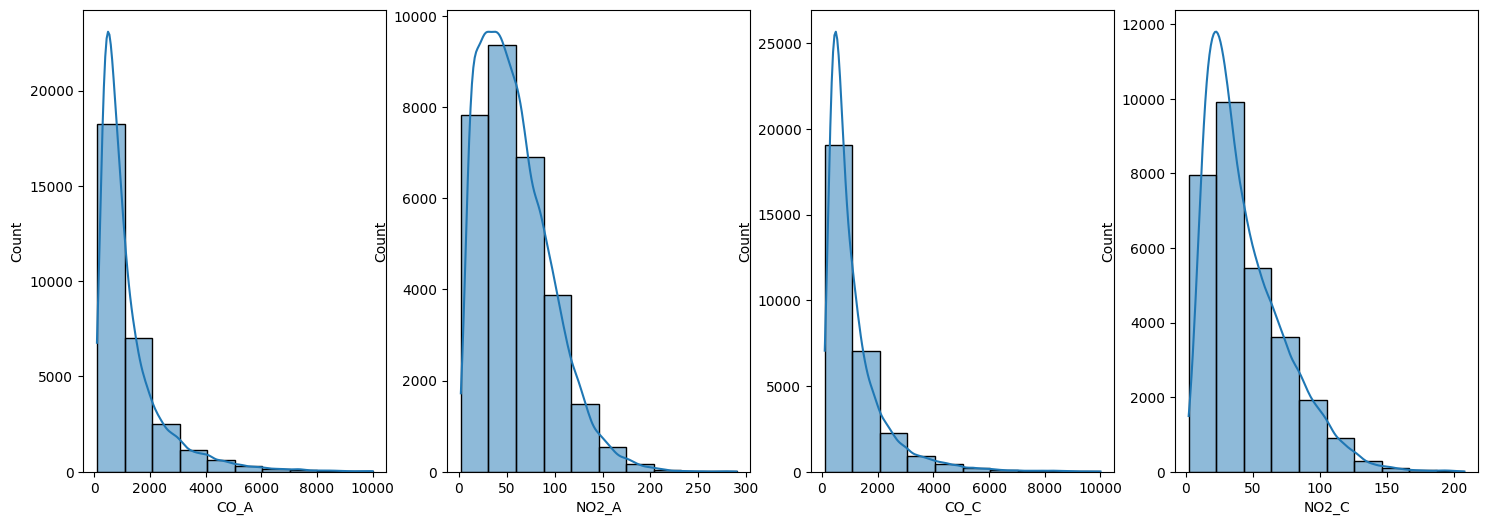

In [16]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(18,6))
columns = ['CO_A', 'NO2_A','CO_C', 'NO2_C']

for i, ax in enumerate(axis):
  sns.histplot(x=main_df[columns[i]], ax=ax, bins=10, kde=True)

plt.show()

Dapat diketahui bahwa variabel **CO_A, NO2_A, CO_C, dan NO2_C** mengalami Right-Skewed Distribution. Hal ini menandakan bahwa keempat variabel ini bisa digunakan secara lanjut dalam proses analisis karena sudah ternormalisasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Konsentrasi Pencemaran Udara Tertinggi di Setiap tahunnya pada Kota Aotizhongxin?

In [17]:
mean_poll_df_A = main_df.resample(rule='Y', on='Date').agg({
    'PM2.5_A' : 'mean',
    'PM10_A' : 'mean',
    'SO2_A' : 'mean',
    'NO2_A' : 'mean',
    'CO_A' : 'mean',
    'O3_A' : 'mean'
})

mean_poll_df_A.index = mean_poll_df_A.index.strftime('%Y')
mean_poll_df_A = mean_poll_df_A.reset_index()
mean_poll_df_A

,Date,PM2.5_A,PM10_A,SO2_A,NO2_A,CO_A,O3_A
0,2013,79.136971,110.361312,23.632075,61.605303,1133.417398,47.852204
1,2014,90.049974,122.197557,21.443963,64.594480,1191.946743,48.350840
2,2015,78.752457,108.452546,14.613293,60.331691,1399.070537,63.373822
3,2016,73.848737,94.119542,10.777584,48.797238,1198.283369,61.923871
4,2017,95.228656,107.867854,21.129918,66.598367,1678.990349,47.466221


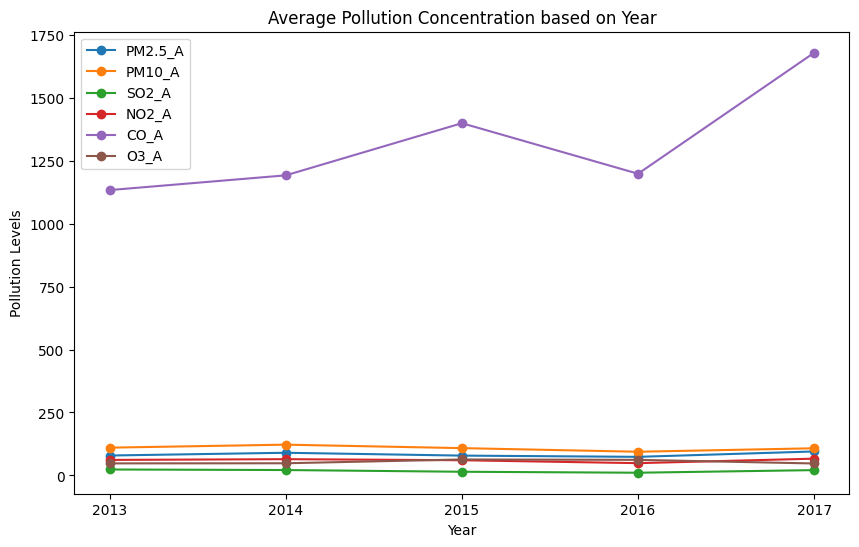

In [18]:
# Plotting
plt.figure(figsize=(10, 6))

# Loop untuk setiap kolom kecuali 'Date'
for column in mean_poll_df_A.columns[1:]:
    plt.plot(mean_poll_df_A['Date'], mean_poll_df_A[column], label=column, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Pollution Levels')
plt.title('Average Pollution Concentration based on Year')
plt.legend()

# Show the plot
plt.show()

Berdasarkan grafik di atas, analisis untuk kadar rata-rata polusi di kota Aotizhongxin menggunakan line chart. Dan untuk kadar CO di kota Aotizhongxin memiliki kadar yang paling tinggi diantara yang lain.

### Pertanyaan 2: Bagaimana Konsentrasi Pencemaran Udara Tertinggi di Setiap tahunnya pada Kota Changping?

In [19]:
mean_poll_C_df = main_df.resample(rule='Y', on='Date').agg({
    'PM2.5_C' : 'mean',
    'PM10_C' : 'mean',
    'SO2_C' : 'mean',
    'NO2_C' : 'mean',
    'CO_C' : 'mean',
    'O3_C' : 'mean'
})

mean_poll_C_df.index = mean_poll_C_df.index.strftime('%Y')
mean_poll_C_df = mean_poll_C_df.reset_index()
mean_poll_C_df

,Date,PM2.5_C,PM10_C,SO2_C,NO2_C,CO_C,O3_C
0,2013,71.260397,90.140595,19.862266,40.640022,1017.542159,62.535339
1,2014,79.443020,106.285561,20.579679,45.354692,1179.795760,64.024974
2,2015,68.411497,91.921467,11.881742,42.556875,1147.771836,57.682060
3,2016,61.493594,85.810549,8.165692,45.688270,1136.099017,54.394950
4,2017,80.761693,94.947290,16.553823,51.287305,1549.962880,33.084633


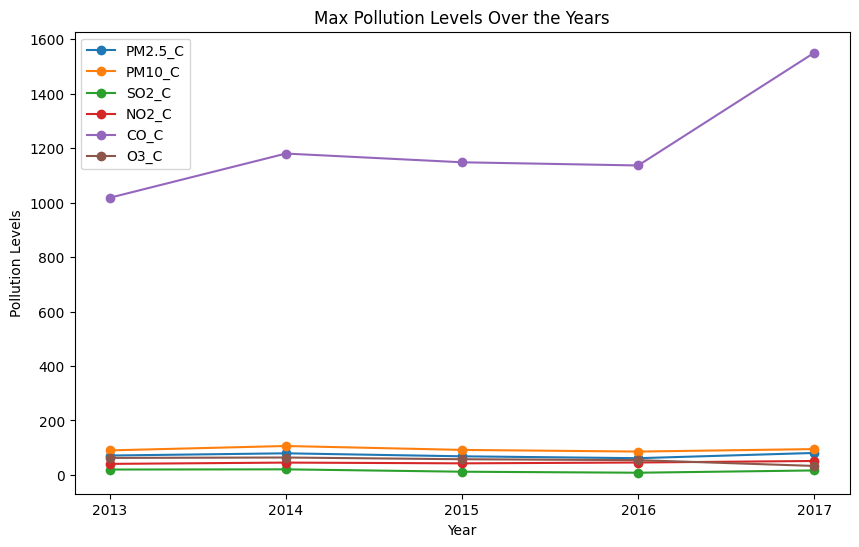

In [20]:
# Plotting
plt.figure(figsize=(10, 6))

# Loop untuk setiap kolom kecuali 'Date'
for column in mean_poll_C_df.columns[1:]:
    plt.plot(mean_poll_C_df['Date'], mean_poll_C_df[column], label=column, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Pollution Levels')
plt.title('Max Pollution Levels Over the Years')
plt.legend()

# Show the plot
plt.show()

Berdasarkan grafik di atas, analisis untuk kadar rata-rata polusi di kota Changping menggunakan line chart. Dan untuk kadar CO di kota Changping memiliki kadar yang paling tinggi diantara yang lain.

### Pertanyaan 3: Bagaimana rata-rata suhu pada setiap daerah?

In [21]:
avg_score_df = main_df.resample(rule='Y', on='Date').agg({
    'TEMP_A' : 'max',
    'TEMP_C' : 'max'
})
avg_score_df.index = avg_score_df.index.strftime('%Y')
avg_score_df = avg_score_df.reset_index()
avg_score_df

,Date,TEMP_A,TEMP_C
0,2013,37.9,37.9
1,2014,40.5,41.4
2,2015,38.8,39.2
3,2016,37.3,38.1
4,2017,15.9,15.6


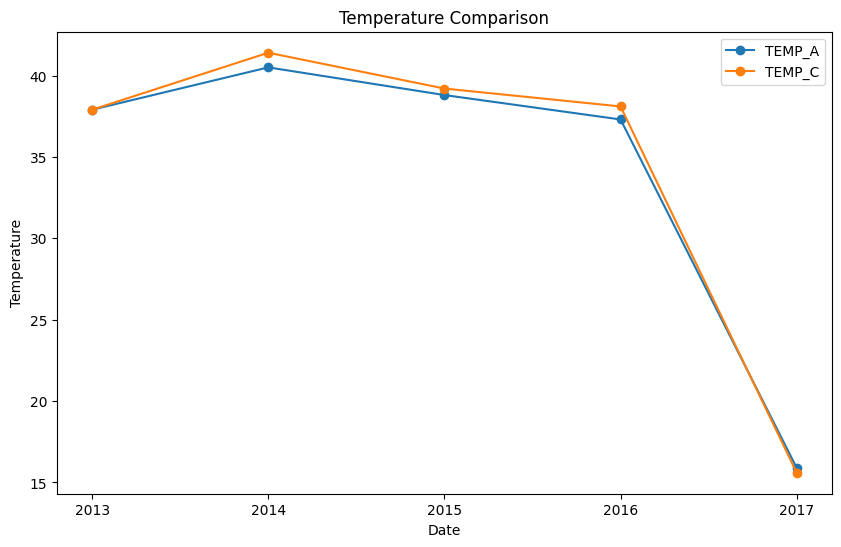

In [22]:
# Plotting
plt.figure(figsize=(10, 6))

# Loop untuk setiap kolom kecuali 'Date'
for column in avg_score_df.columns[1:]:
    plt.plot(avg_score_df['Date'], avg_score_df[column], label=column, marker='o')

plt.title('Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Show the plot
plt.show()

Berdasarkan grafik temperatur pada kedua kota, bisa dilihat untuk kota Changping cenderung memiliki temperatur yang lebih tinggi dari pada kota Aotizhongxin.

## Conclusion

- Conclution pertanyaan 1
  1. Polusi udara pada kota Aotizhongxin memiliki keberagaman dari beberapa konsentrasi yang ada. Dan nampak juga pada grafik yang ada bahwa CO memiliki kadar yang paling tinggi.
  2. Konsentrasi polusi udara yang lain cenderung rendah, sehingga pada grafik seperti tidak ada perubahan di setiap tahunnya.
  3. Konsentrasi untuk polusi CO tertinggi terjadi pada tahun 2017, yaitu sejumlah lebih dari 1500 kadar polusinya.

- Conclution pertanyaan 2
  1. Polusi udara pada kota Changping kurang lebih sama dengan kota Aotizhongxin. Konsentrasi polusi CO adalah yang paling tinggi di kota Changping. Tetapi terjadi perbedaan angka pastinya dengan kadar polusi di kota Aotizhongxin.
  2. Konsentrasi untuk polusi CO tertinggi terjadi pada tahun 2017, yaitu sejumlah lebih dari 1500 kadar polusinya. Akan tetapi, tidak lebih tinggi dibanding kota Aotizhongxin.

- Conclution pertanyaan 3
  1. Pada grafik tersebut terdapat dua garis yang menandakan dua kota yang berbeda. Garis biru gelap untuk kota Changping sedangkan biru muda untuk kota Aotizhongxin.
  2. Untuk kota Changping cenderung memiliki suhu yang lebih tinggi dibanding Aotizhongxin, akan tetapi tidak di semua tahun. Akan tetapi, menuju tahun 2017 kota Aotizhongxin yang lebih tinggi.
  3. Data tersebut diambil dari rata-rata suhu di setiap tahunnya, sehingga dari angka tersebut diambil untuk mewakilkan suhu tiap tahunnya di tiap kota.